# Ejercicio 2 - Sistemas no lineales y modelado SIR
Michelle Mejia y Silvia Illescas

## Teoría

1. Compare sistemas lineales y no lineales (p. ej., modelo SIR: βSI vs. recuperación lineal μI).
Los sistemas lineales se caracterizan porque los cambios en las variables dependen proporcionalmente de una sola variable, lo que permite que las soluciones se sumen y se comporten de manera predecible. En el modelo SIR, la recuperación es un proceso lineal, ya que ocurre a una tasa proporcional al número de infectados: μI. En contraste, los sistemas no lineales involucran interacciones entre variables, como el término de contagio βSI, que depende del producto entre susceptibles e infectados. Esta no linealidad produce dinámicas más complejas, como curvas epidémicas con picos, puntos de inflexión y umbrales críticos, y hace necesario el uso de simulaciones para analizar su comportamiento.

2. Defina la fuerza de infección (λ = βcI/N) y su doble interpretación:
La fuerza de infección (λ) es la tasa a la que un individuo susceptible se infecta, y se calcula como:

        𝜆 = 𝛽𝑐𝐼/𝑁

donde: - β es la probabilidad de transmisión por contacto,c es el número promedio de contactos por persona por unidad de tiempo, I es el número de infectados y N es la población total.

a. Riesgo por susceptibilidad:
Desde esta perspectiva, λ representa la probabilidad por unidad de tiempo de que una persona susceptible se infecte, en función de la fracción de la población que está infectada. Es una medida del riesgo individual de contagio.

b. Tasa de propagación por infección:
Desde el punto de vista de los infectados, λ refleja la eficiencia con la que cada infectado contribuye a propagar la enfermedad. Es decir, cómo la interacción entre infectados y susceptibles, modulada por los contactos y la probabilidad de transmisión, determina la expansión de la epidemia.

3. Explique por qué los sistemas no lineales requieren simulación (no se requieren soluciones de forma cerrada).
Los sistemas no lineales, como el modelo SIR con el término de contagio βSI, presentan dinámicas complejas debido a que las variables interactúan entre sí de manera multiplicativa. Esta interdependencia hace que no sea posible obtener soluciones analíticas exactas o de “forma cerrada” como en los sistemas lineales. Además, su comportamiento puede incluir fenómenos como picos, umbrales, y puntos de inflexión, que dependen fuertemente de las condiciones iniciales y los parámetros del sistema. Por eso, se recurre a simulaciones numéricas, que permiten aproximar la evolución del sistema a lo largo del tiempo y analizar distintos escenarios de forma flexible y visual.

4. Para un modelo SIR con 𝑅0=3

a. Explique qué es 𝑅0:
El número básico de reproducción, 𝑅0, representa el número promedio de contagios que una persona infectada genera en una población completamente susceptible. Si 𝑅0>1, la enfermedad puede propagarse; si 𝑅0<1, la epidemia tiende a desaparecer. En este caso, un 𝑅0=3 indica que cada infectado contagia en promedio a tres personas al inicio de la epidemia.

b. Calcule el umbral de inmunidad de grupo:
El umbral de inmunidad de grupo se calcula como:

𝐻=1−1/𝑅0=1−1/3=2/3=66.7%

Esto significa que aproximadamente el 66.7 % de la población debe ser inmune (por vacunación o recuperación) para evitar una propagación sostenida de la enfermedad.

c. Dibuje las curvas epidémicas esperadas para S, I, R:

S (Susceptibles): Comienza alta (cerca del 100 %) y disminuye continuamente a medida que la población se infecta.

I (Infectados): Comienza baja, crece rápidamente hasta un pico y luego disminuye conforme las personas se recuperan.

R (Recuperados): Comienza en cero y aumenta constantemente, ya que las personas que se recuperan pasan a esta categoría.

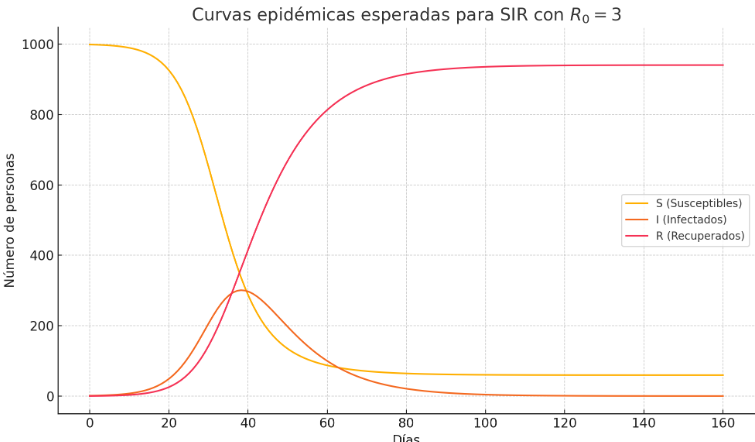


4. ¿Por qué el término βSI crea puntos de inflexión?
El término βSI es no lineal porque depende del producto entre el número de susceptibles (S) y el número de infectados (I). Esta interacción produce un comportamiento cambiante en la tasa de nuevos contagios: al inicio de la epidemia, cuando hay muchos susceptibles y los infectados comienzan a aumentar, el valor de βSI también crece, acelerando la propagación. Sin embargo, a medida que los susceptibles disminuyen, aunque los infectados aún sean numerosos, el valor de βSI empieza a reducirse, desacelerando la transmisión. Este cambio en la curvatura del crecimiento de infectados genera un punto de inflexión, donde la epidemia deja de acelerarse y comienza a desacelerarse. Es decir, el término βSI permite que la curva de infectados tenga una forma de campana con un pico claramente definido.

## Práctica


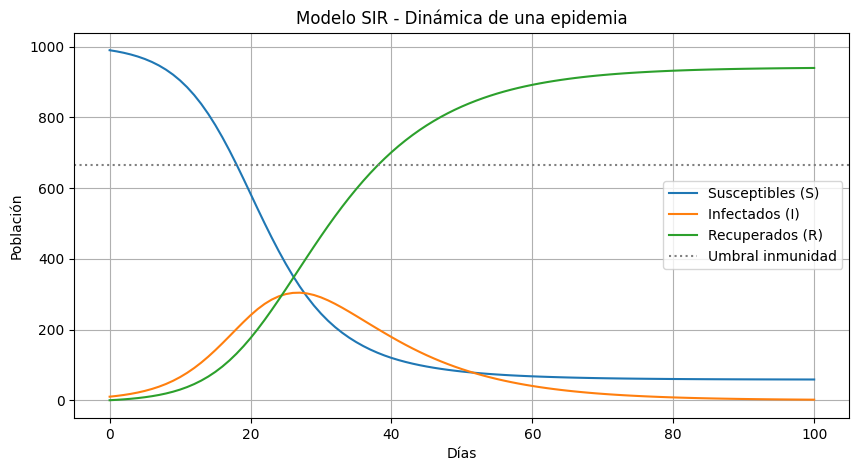

R₀ = 3.00
Umbral de inmunidad de grupo ≈ 66.67%


In [1]:
# Práctica - Simulación del modelo SIR
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parámetros iniciales
S0, I0, R0 = 990, 10, 0
beta = 0.3    # tasa de infección
mu = 0.1      # tasa de recuperación
N = S0 + I0 + R0

def sir_model(t, y):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - mu * I
    dRdt = mu * I
    return [dSdt, dIdt, dRdt]

# Simulación sin vacunación
t_span = [0, 100]
t_eval = np.linspace(*t_span, 101)
sol = solve_ivp(sir_model, t_span, [S0, I0, R0], t_eval=t_eval)
S, I, R = sol.y

# Calcular R0 y umbral de inmunidad
R_0 = beta / mu
umbral_inmunidad = 1 - 1/R_0

# Graficar
plt.figure(figsize=(10,5))
plt.plot(t_eval, S, label='Susceptibles (S)')
plt.plot(t_eval, I, label='Infectados (I)')
plt.plot(t_eval, R, label='Recuperados (R)')
plt.axhline(y=N * (1 - 1/R_0), color='gray', linestyle=':', label='Umbral inmunidad')
plt.title('Modelo SIR - Dinámica de una epidemia')
plt.xlabel('Días')
plt.ylabel('Población')
plt.legend()
plt.grid(True)
plt.show()

print(f"R₀ = {R_0:.2f}")
print(f"Umbral de inmunidad de grupo ≈ {umbral_inmunidad:.2%}")

Último prompt utilizado:

“¿Para qué sirve solve_ivp y cómo se integra con esta librería?”

Funcionó:
Este prompt me ayudó a entender que básicamente es una función de SciPy que resuelve ecuaciones diferenciales, como las del modelo SIR. Me explicó cómo se usa, qué argumentos necesita y cómo se conecta con el sistema dinámico que simula la propagación de una epidemia.

Análisis de la solución:
La solución me mostró que esta librería evita implementar métodos como Euler o Runge-Kutta manualmente, resolviendo bastante bien el sistema SIR.